<a href="https://colab.research.google.com/github/congminhdinh/ForecastWithML/blob/master/Hoiquytuyentinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn


1. Chuẩn bị data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
excel_file_path = "/content/drive/MyDrive/data.xlsx"

xls = pd.read_excel(excel_file_path, sheet_name=None)

combined_data = pd.concat(xls.values(), ignore_index=True)
combined_data

,Date,Rain,SM20,ISM1,ISM2,WNPSM1,WNPSM2,EASM1,EASM2
0,1995-01-06,8.425097,321.3942,-2.569368,1.307820,-8.443377,0.387754,-6.957105,4.233370
1,1995-01-13,7.030345,304.0812,-1.076160,1.736107,-6.877413,1.441991,-4.330927,4.338108
2,1995-01-20,4.387738,297.4512,-4.294856,1.020202,-8.945033,0.870796,-6.726988,4.475098
3,1995-01-27,16.039889,299.6463,-6.443747,3.713248,-6.688767,0.374906,-5.466241,2.637514
4,1995-02-03,10.584748,300.6907,-5.729650,1.566500,-9.360853,-0.727006,-7.509658,2.596001
...,...,...,...,...,...,...,...,...,...
3915,2014-12-01,40.965200,387.7189,-5.297181,-0.995078,-5.130825,-4.243564,-8.518342,0.387429
3916,2014-12-08,24.871200,360.5285,-2.719633,0.343970,-6.050766,-0.768782,-5.682514,-0.107010
3917,2014-12-15,4.937800,356.7191,-4.601669,-0.157719,-5.043267,-4.688618,-10.422690,0.157394
3918,2014-12-22,32.548900,355.9089,-3.671844,0.241657,-6.496911,-2.823224,-9.483693,1.959430


In [ ]:
from sklearn.model_selection import train_test_split
datasets = combined_data.drop('Date', axis = 1)
x = datasets.drop('Rain', axis=1)
y = datasets['Rain']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train

,SM20,ISM1,ISM2,WNPSM1,WNPSM2,EASM1,EASM2
3741,424.0465,0.047343,1.483126,-5.442464,2.496830,-5.918247,2.989260
519,451.6663,0.672248,3.823884,-0.443317,3.633383,-0.958043,2.540967
944,286.1556,-4.291000,1.069043,-4.396982,0.098295,-6.656946,3.837590
3636,362.8665,-5.386304,6.187814,-3.780405,1.013598,-2.809101,0.491419
351,284.2658,-5.230501,1.035329,-8.070593,2.411056,-7.474921,7.820694
...,...,...,...,...,...,...,...
835,318.8608,-5.422889,-1.308559,-10.627140,-2.086678,-9.910186,2.543952
3264,449.0558,16.855250,3.103487,6.895425,-4.199052,2.940372,-2.392900
1653,443.7177,14.853470,5.095407,0.065924,3.501139,-0.592418,2.927217
2607,287.6108,-3.455046,3.593222,-8.142846,-0.016354,-6.260408,0.474880


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.57009086, -0.43642532, -0.49381767, ...,  0.74613334,
        -0.69781152,  0.45363671],
       [ 0.98933436, -0.3555619 ,  0.5705946 , ...,  1.14138965,
         0.5789927 ,  0.26688649],
       [-1.52296789, -0.99781221, -0.68211353, ..., -0.08799946,
        -0.88795974,  0.80703464],
       ...,
       [ 0.86868182,  1.47950551,  1.14879392, ...,  1.09539947,
         0.67310793,  0.4277908 ],
       [-1.50087927, -0.88963874,  0.46570573, ..., -0.12787056,
        -0.78588705, -0.5938057 ],
       [ 1.10867846,  1.03929551, -0.3622871 , ..., -1.14416825,
        -0.26063115, -0.46028354]])

2. Đưa vào training với mô hình Linear Regression (hồi quy tuyến tính)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_train, y_train)
rfe = RFE(linear, n_features_to_select=6)
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
r2 = r2_score(y_test, y_pred)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('Training score: \n', linear.score(x_train, y_train))
print('R2 score: ', r2)


Coefficient: 
 [19.06783428  3.67888848  2.83292917 -0.77649987  0.98916572 -0.51442111
 -0.19746541]
Intercept: 
 40.277948692994265
Training score: 
 0.670024257838369
R2 score:  0.6953311190625298


3. Evaluation (đánh giá):
K-fold cross validation: hàm đánh giá một bộ dữ liệu nhiều lần, bằng cách chia bộ dữ liệu train thành K phần và đẩy kết quả đánh giá từng phần vào array

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(linear, x_train, y_train, scoring='r2',cv = k_folds)
print(scores)
print('\n', scores.mean())

[0.70151038 0.67596677 0.65823216 0.65351204 0.6505551 ]

 0.6679552902752457


4. Hyperparameters tuning: cải tiến tham số. Ta sử dụng GridSearchCV và RandomizedSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
import numpy as np

hyper_params = [{'n_features_to_select': list(range(1, 14))}]
rfe = RFE(linear)
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = k_folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045816,0.010382,0.001181,0.000108,1,{'n_features_to_select': 1},0.679410,0.656571,0.651128,0.640036,...,0.651258,0.016946,13,0.644949,0.650274,0.651867,0.654583,0.657158,0.651767,0.004140
1,0.040031,0.004764,0.002910,0.002132,2,{'n_features_to_select': 2},0.693790,0.667832,0.648444,0.652623,...,0.660796,0.018644,12,0.657174,0.663207,0.655539,0.667233,0.669928,0.662616,0.005565
2,0.041812,0.004243,0.001525,0.000223,3,{'n_features_to_select': 3},0.698844,0.674615,0.661560,0.654722,...,0.667705,0.017786,10,0.661053,0.666659,0.670117,0.671845,0.673127,0.668560,0.004337
3,0.039208,0.005566,0.004059,0.003524,4,{'n_features_to_select': 4},0.699970,0.676694,0.658780,0.652296,...,0.667524,0.018743,11,0.662043,0.667392,0.671950,0.672984,0.674139,0.669702,0.004461
4,0.039178,0.010420,0.005113,0.004412,5,{'n_features_to_select': 5},0.701406,0.676725,0.658340,0.653234,...,0.668141,0.018933,1,0.662202,0.667999,0.672659,0.673899,0.674304,0.670213,0.004591
5,0.022150,0.003149,0.001851,0.000781,6,{'n_features_to_select': 6},0.701466,0.675934,0.658260,0.653473,...,0.667929,0.018946,9,0.662222,0.668044,0.672704,0.673916,0.674429,0.670263,0.004610
6,0.011384,0.001854,0.003320,0.004031,7,{'n_features_to_select': 7},0.701510,0.675967,0.658232,0.653512,...,0.667955,0.018953,2,0.662228,0.668059,0.672704,0.673926,0.674429,0.670270,0.004608
7,0.013795,0.004171,0.001529,0.000236,8,{'n_features_to_select': 8},0.701510,0.675967,0.658232,0.653512,...,0.667955,0.018953,2,0.662228,0.668059,0.672704,0.673926,0.674429,0.670270,0.004608
8,0.008695,0.004286,0.001159,0.000102,9,{'n_features_to_select': 9},0.701510,0.675967,0.658232,0.653512,...,0.667955,0.018953,2,0.662228,0.668059,0.672704,0.673926,0.674429,0.670270,0.004608
9,0.003842,0.000172,0.001038,0.000018,10,{'n_features_to_select': 10},0.701510,0.675967,0.658232,0.653512,...,0.667955,0.018953,2,0.662228,0.668059,0.672704,0.673926,0.674429,0.670270,0.004608


thay đổi tham số n_features ta được giá trị tối ưu là 5

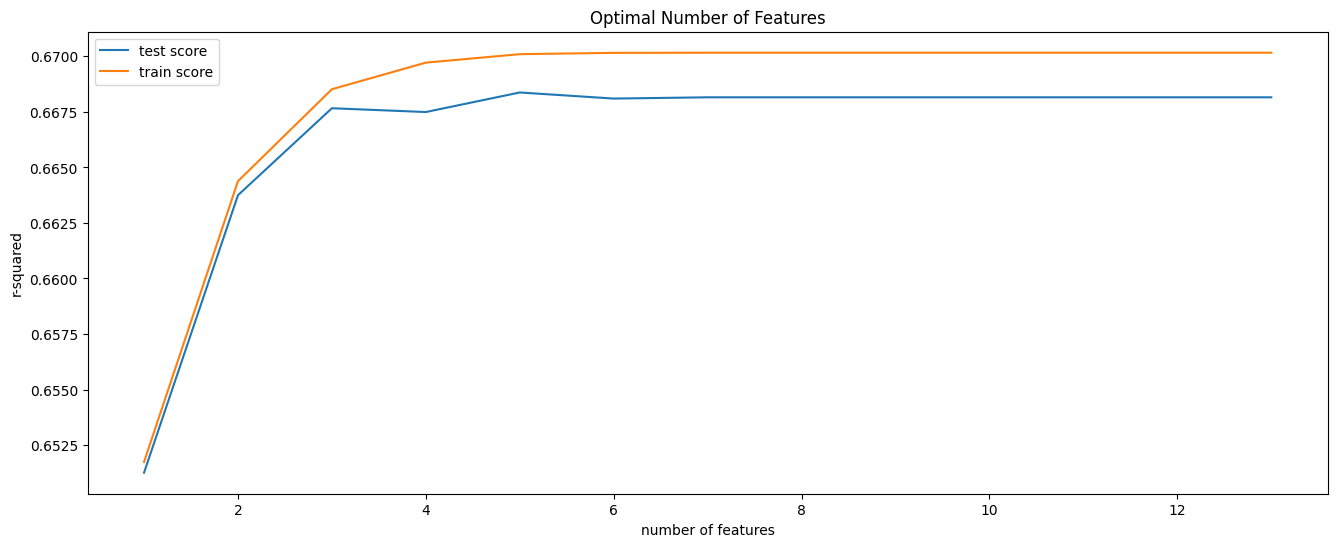

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
n_features_optimal = 5

linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

rfe = RFE(linear, n_features_to_select=n_features_optimal)
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = linear.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6955885963996092
